# Python par l'exemple

Exemple de programme qui montre des bases de programmation python, utiles à l'analyse scientifique.

Vous pouvez utiliser les icônes Copier / Coller pour ré-utiliser une partie de code pour un exercice.
L'icone >> permet de re-exécuter toutes les lignes du début jusqu'à la fin, ce qui peut être utile lorsqu'on a modifié l'ordre des lignes d'éxécution.

Ludovic Gaudichet
2020, Lycée René Cassin Noisiel


In [1]:
import math
import matplotlib.pyplot as plt

### Déclaration d'une variable,
### suivie d'un commentaire explicite :

In [2]:
P0 = 1013 # (hPa) pression atmosphérique au niveau de la mer
altitude = 800 # (m) une altitude exemple

### Calcul mathématique :

La pression atmosphérique est censée diminuer exponentiellement avec l'altitude, étant divisée par 2 tous les 5500 m (probablement très empirique).

Cela se traduit par la formule suivante :

 pression = P0*exp((-ln 2 /5500)*altitude)

In [3]:
Const = -math.log(2)/5500
pression = P0*math.exp(Const*altitude)

### Affichage d'un texte, d'un résultat de calcul :

In [4]:
print("Altitude =",altitude, "m, pression =", pression,"hPa")

Altitude = 800 m, pression = 915.847710708493 hPa


### EXERCICE :
Modifier et re-éxecuter les lignes précédentes pour afficher la pression à 4810 m d'altitude.

### Structure conditionnelle (faire quelque chose si ... sinon ...)  :


La formule précédente ne marche que dans l'atmosphère, donc par pour des altitudes négatives (dans l'eau).

In [5]:
altitude = -500000 #(m)

if (altitude>0):

    pression = P0*math.exp(Const*altitude)

print("ALTITUDE=", altitude,", PRESSION = ", pression)

ALTITUDE= -500000 , PRESSION =  915.847710708493


### Indentation :
Les lignes de code doivent être indentées de la même manière (espaces aux début de la ligne) pour être dans la même structure (ici, sous la même condition).

### EXERCICE :
indenter la ligne print précédente pour que le texte en lettres capitales ne soit affiché que si l'altitude est positive, et donc ne s'affiche pas ...

### Option des branchements conditionnels
On peut utiliser le 'elif' et le 'else' pour faire les bons calculs dans les
différents cas :

In [6]:
if (altitude>0):
    pression = P0*math.exp(Const*altitude)

elif (altitude<0) and (altitude>-10971):
    print("Rq : altitude < 0 : dans l'eau ...")
    # Dans l'eau, on peut utiliser le principe fondamentale de
    # l'hydrostatique pour calculer la pression : pression = P0 - rho.g.altitude
    pression = P0 - 1025*9.81*altitude/100 # calcul en hPa

else:
    print("Rq : Une profondeur de",altitude, "m n'existe pas sur Terre !")
    pression = P0 - 1025*9.81*altitude/100 # calcul en hPa

Rq : Une profondeur de -500000 m n'existe pas sur Terre !


In [7]:
print("Altitude =",altitude, "m , pression =", pression,"hPa")

Altitude = -500000 m , pression = 50277263.0 hPa


### Définition d'une fonction

Une fonction permet d'appeler à volonté un sous-programme faisant un traitement : ici la fonction calcule la pression si on lui donne l'altitude en entrée.

In [8]:
def Pression(alt):

    if (alt>0):
        pres = P0*math.exp(Const*alt)
    else:
        pres = P0 - 1025*9.81*alt/100 # calcul en hPa
    return (pres)

In [9]:
altitude = -100 # (m)
print("La pression à une altitude de", altitude, "m est de",
    Pression(altitude),"hPa")

La pression à une altitude de -100 m est de 11068.25 hPa


### Les boucles for 

A utiliser lorsque l'on connait le nombre d'itérations :

La structure dans la boucle suivante va s'éxécuter avec i = 0, 1, 2, 3 et 4 (donc 5 fois) :

In [10]:
for i in range(0,5):

    altitude = -90+i*10;
    print("i =", i, ", altitude =", altitude, "m, pression =",
        Pression(altitude),"hPa" )

i = 0 , altitude = -90 m, pression = 10062.725 hPa
i = 1 , altitude = -80 m, pression = 9057.2 hPa
i = 2 , altitude = -70 m, pression = 8051.675 hPa
i = 3 , altitude = -60 m, pression = 7046.15 hPa
i = 4 , altitude = -50 m, pression = 6040.625 hPa


### EXERCICE :

Ecrire dans la case suivante une autre boucle sur ce modèle, pour afficher les pressions à des profondeurs de -40m , -30 m, -20 m -10 m et 0 m.

### les listes :
Ce sont des tableaux. Elles seront indispensables, notamment pour stocker et traiter des valeurs successives d'une même grandeur.
On pourra très souvent se limiter à une liste à une seule dimension, dans ce cas la liste est équivalente à une seule colonne ou ligne t'un tableur.

In [11]:
listX = [50,1000,2000,3000,4000,5000,6000,7000,8000,9000] # altitude en m

In [12]:
print("La première valeur de la liste est",listX[0],
    "et la dernière est",listX[9])

La première valeur de la liste est 50 et la dernière est 9000


### EXERCICE :
Faire afficher la valeur list1[10] et regarder le message d'erreur

### Remarques :
Les valeurs dans les listes sont référencées par des indices entre crochets.
Attention : la première valeur est référencée avec l'indice 0 !

Une liste peut aussi est remplie au fur et à mesure d'un traitement :

In [13]:
listY = [] # juste une déclaration, la liste est vide pour l'instant

In [14]:
for i in range(0,10):
    listY.append( Pression(listX[i]) )

In [15]:
print("listY est remplie avec les pressions aux altitudes définies dans la",
    "première liste :", listY)

listY est remplie avec les pressions aux altitudes définies dans la première liste : [1006.6368139490561, 893.0519413109695, 787.3067817169706, 694.0827737607426, 611.8973035908525, 539.4433118013411, 475.56850625015426, 419.25703626165665, 369.6133367638262, 325.84788542088864]


### liste et graphique
Les données doivent justement être dans des listes pour obtenir des graphiques, grâce à la librairie matplotlib.
Dans cet exemple, on va tracer la pression en fonction de l'altitude :

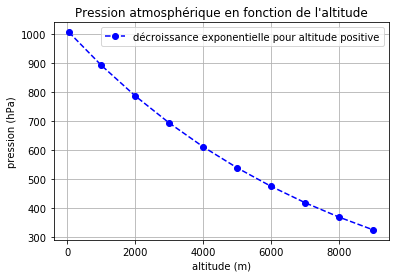

In [16]:
plt.close()
#plt.clf()
plt.grid(True)
plt.xlabel('altitude (m)')
plt.ylabel('pression (hPa)')
plt.title("Pression atmosphérique en fonction de l'altitude")

plt.plot(listX,listY,'o--',label = 'décroissance exponentielle pour altitude positive', color='blue')

plt.legend()
plt.show()

### EXERCICE :
Créer des listes listX2 et listY2 contenant 15 valeurs, et avec notamment des valeurs d'altitudes négatives (listX2).
Afficher le graphique correspondant.